# Simulation of a ring attractor network

**Aims**
- Implement a simulation of a ring attractor network
- Test if ring shaped attractor manifold can be recovered from simulated data

## Import statements

In [361]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import sklearn.decomposition as skd
import networkx as nx

## Setting up simulation

In [362]:
# Attractor parameters
num_neurons = 20
num_pos = 2

max_rate = 10

init_state = np.zeros(num_neurons)
init_state[num_neurons//2] = 1

In [363]:
# Make adjacency matrix
adjacency_matrix = np.zeros((num_neurons, num_neurons))
id_array = list(range(num_neurons)) + list(range(num_neurons)) + list(range(num_neurons)) 
for i in range(num_neurons):
    for j in range(num_neurons):
        pos_set = id_array[num_neurons + i-num_pos:num_neurons + i+num_pos+1]
        if i != j:
            if j in pos_set:
                adjacency_matrix[i, j] = 1
            else:
                adjacency_matrix[i, j] = -1
        else:
            adjacency_matrix[i, j] = 0

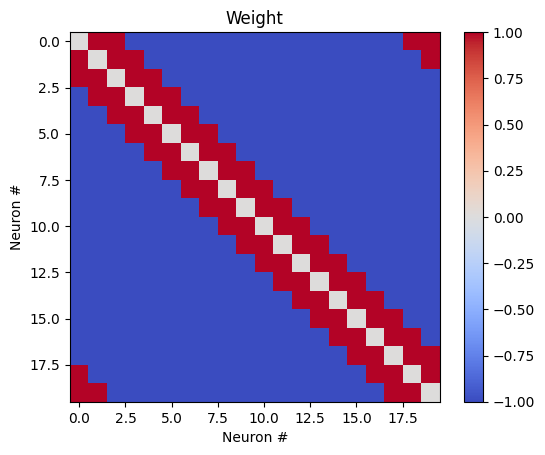

In [364]:
plt.imshow(adjacency_matrix, cmap='coolwarm', interpolation='nearest')
plt.xlabel("Neuron #")
plt.ylabel("Neuron #")
plt.title("Weight")
plt.colorbar()

In [365]:
# Cellular automata updator

def update_state(state, adjacency_matrix):
    new_state = np.zeros(len(state))
    for i in range(len(state)):
        change = np.sum([k*np.max([0, state[index]]) for index, k in enumerate(adjacency_matrix[i])])/len(state)
        if change > 0:
            new_state[i] = state[i] + change * ((max_rate - state[i])/max_rate)**2
        else:
            new_state[i] = state[i] + change 
        new_state[i] = np.max([0, new_state[i]])
        if new_state[i] > max_rate:
            new_state[i] = max_rate
    return new_state

In [366]:

def update_state(state, adjacency_matrix, max_rate):
    # Calculate the change
    positive_state = np.maximum(0, state)
    changes = np.dot(adjacency_matrix, positive_state) / len(state)

    # Update the state
    new_state = state + changes * np.where(changes > 0, ((max_rate - state) / max_rate) ** 2, 1)

    # Clip the state values
    new_state = np.clip(new_state, 0, max_rate)
    
    return new_state

## Run the simulation

In [367]:
# Simulation parameters
cycles = 100
state = init_state

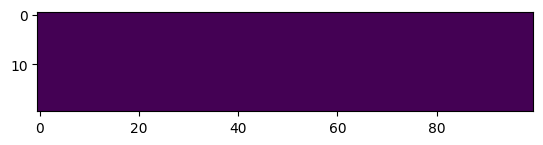

In [368]:
# Stimulation paradigm
stimulation = np.zeros((num_neurons, cycles))
counter = 0
for i in range(cycles):
    stimulation[id_array[int(counter)%num_neurons], i] = 0
    counter +=0.5
plt.imshow(stimulation, cmap='viridis', interpolation='nearest')

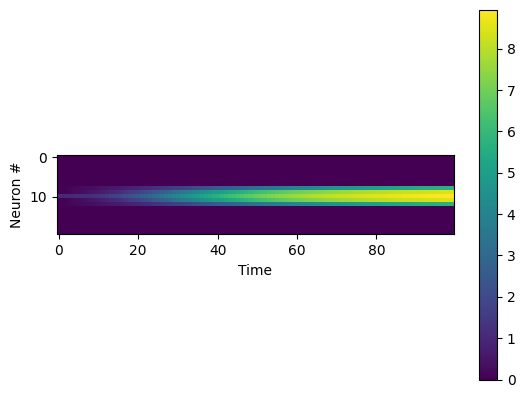

In [369]:
# Run the simulation
all_states = []
for i in range(cycles):
    all_states.append(state)
    #state += stimulation[:, i]
    state = update_state(state, adjacency_matrix, max_rate)
    

all_states = np.array(all_states).T
plt.imshow(all_states, cmap='viridis', interpolation='nearest')
plt.xlabel("Time")
plt.ylabel("Neuron #")
plt.colorbar()

## Testing attractor network with stochastic starting states

In [370]:
# Run the simulation for many initial conditions
N = 1000
cycles = 200
all_states = []
for i in range(N):
    init_state = [np.random.rand()*max_rate for i in range(num_neurons)]
    state = np.array(init_state)
    for i in range(cycles):
        state = update_state(state, adjacency_matrix, max_rate)
    all_states.append(state)

Text(0, 0.5, 'Neuron #')

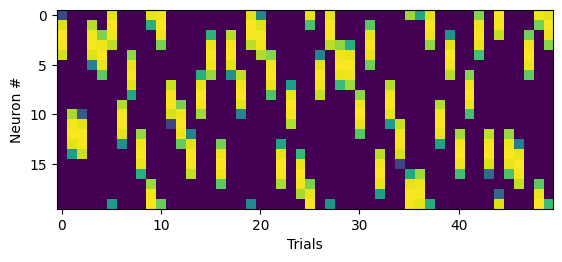

In [371]:
# Plot of convergence state for each trial
plt.imshow(np.array(all_states)[:50].T)
plt.xlabel('Trials')
plt.ylabel('Neuron #')

In [372]:
pca = skd.PCA(n_components = 2)
matrix = all_states.copy()
matrix_out = pca.fit_transform(matrix)

Text(0.5, 1.0, 'PCA plot of attractor states')

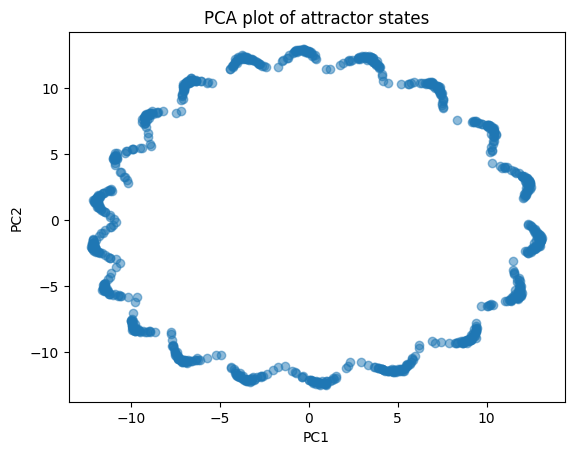

In [373]:
plt.plot(matrix_out[:, 0], matrix_out[:, 1], 'o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA plot of attractor states")